In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import random as rn
import scipy.stats as si

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Clari\Downloads\HistoricalData_1706458649434.csv")
df.head()


,Date,Si,Volume,Open,High,Low
0,01/26/2024,1.3451,NaN,1.3474,1.3484,1.3415
1,01/25/2024,1.3472,NaN,1.3474,1.3483,1.3466
2,01/24/2024,1.3518,NaN,1.3522,1.3535,1.3515
3,01/23/2024,1.3470,NaN,1.3460,1.3479,1.3456
4,01/22/2024,1.3466,NaN,1.3478,1.3486,1.3464


In [3]:
df.rename(columns={"Close/Last": "Si"})

,Date,Si,Volume,Open,High,Low
0,01/26/2024,1.3451,NaN,1.3474,1.3484,1.3415
1,01/25/2024,1.3472,NaN,1.3474,1.3483,1.3466
2,01/24/2024,1.3518,NaN,1.3522,1.3535,1.3515
3,01/23/2024,1.3470,NaN,1.3460,1.3479,1.3456
4,01/22/2024,1.3466,NaN,1.3478,1.3486,1.3464
...,...,...,...,...,...,...
150,08/02/2023,1.3355,NaN,1.3348,1.3356,1.3334
151,08/01/2023,1.3291,NaN,1.3279,1.3297,1.3266
152,07/31/2023,1.3221,NaN,1.3187,1.3223,1.3184
153,07/30/2023,1.3251,NaN,1.3253,1.3262,1.3238


In [4]:
df.tail()


,Date,Si,Volume,Open,High,Low
150,08/02/2023,1.3355,NaN,1.3348,1.3356,1.3334
151,08/01/2023,1.3291,NaN,1.3279,1.3297,1.3266
152,07/31/2023,1.3221,NaN,1.3187,1.3223,1.3184
153,07/30/2023,1.3251,NaN,1.3253,1.3262,1.3238
154,07/28/2023,1.3253,NaN,1.3225,1.3253,1.3202


In [5]:
S0=1.3451

In [6]:
T=1
N=154

In [7]:
dt=T/N
dt

0.006493506493506494

In [8]:
df["ui"] = df["Si"].pct_change(1)
df.head()

,Date,Si,Volume,Open,High,Low,ui
0,01/26/2024,1.3451,NaN,1.3474,1.3484,1.3415,NaN
1,01/25/2024,1.3472,NaN,1.3474,1.3483,1.3466,0.001561
2,01/24/2024,1.3518,NaN,1.3522,1.3535,1.3515,0.003414
3,01/23/2024,1.3470,NaN,1.3460,1.3479,1.3456,-0.003551
4,01/22/2024,1.3466,NaN,1.3478,1.3486,1.3464,-0.000297


In [9]:
df.tail()

,Date,Si,Volume,Open,High,Low,ui
150,08/02/2023,1.3355,NaN,1.3348,1.3356,1.3334,0.000375
151,08/01/2023,1.3291,NaN,1.3279,1.3297,1.3266,-0.004792
152,07/31/2023,1.3221,NaN,1.3187,1.3223,1.3184,-0.005267
153,07/30/2023,1.3251,NaN,1.3253,1.3262,1.3238,0.002269
154,07/28/2023,1.3253,NaN,1.3225,1.3253,1.3202,0.000151


In [10]:
σ = np.std(df["ui"])*np.sqrt(154)
σ

0.0366488199333743

In [11]:
r=0.0482
rf=0.05405
μ = r-rf
μ

-0.005850000000000001

In [12]:
M = int(5*1e4)
M

50000

In [13]:
dz = rn.randn(M,N)

In [14]:
S = S0*np.ones((M,N+1))

In [15]:
for i in range(0,N):
    S[:,i+1] = S[:,i] + S[:,i]*μ*dt + S[:,i]*σ*dz[:,i]*np.sqrt(dt)

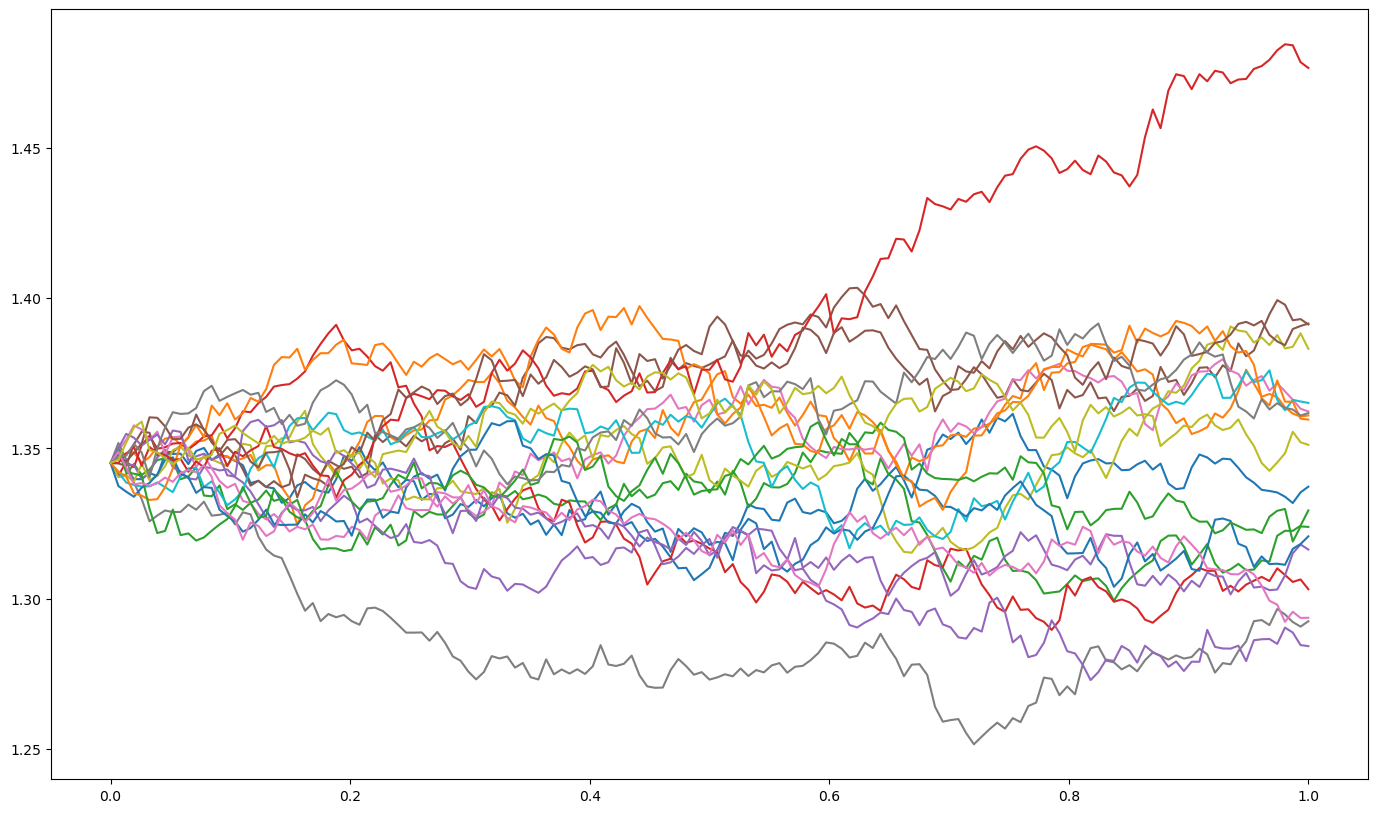

In [16]:
plt.figure(figsize=(17,10))

a = [ rn.randint(0,M) for j in range(1,20)]
for runer in a:
    plt.plot(np.arange(0,T+dt,dt),S[runer])

In [17]:
V = (S[:,-1])
print("The expected value for the exchange rate is:","{:.3f}".format(np.mean(V)))
print("The standard error of sample mean is:", "{:.4%}".format(np.std(V)/np.sqrt(M)))

The expected value for the exchange rate is: 1.337
The standard error of sample mean is: 0.0219%


In [18]:
from scipy.stats import norm

In [19]:
def normsinv(x):
    x = si.norm.ppf(x)
    return (x)

In [22]:
z = normsinv (0.975)
μ = np.mean(V)
SE = np.std(V)/np.sqrt(M)

In [24]:
print("Lower 95% is:","{:.3%}".format( (μ-z*SE) ))
print("Upper 95% is:","{:.3%}".format( (μ+z*SE) ))


Lower 95% is: 133.648%
Upper 95% is: 133.734%
